In [50]:
import numpy as np
import pandas as pd	
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [51]:
np.random.seed(42)
size = np.random.randint(800, 2000, 100)
bedroom = np.random.randint(1, 5, 100)
age = np.random.randint(1, 30, 100)

# price = 50000 + (size * 100) + (bedroom * 20000) - (age * 1000) + np.random.normal(0, 10000, 100)
price = 50 + 0.05 * size + 10 * bedroom - 0.7 * age + np.random.normal(0, 10, 100)

In [52]:
df = pd.DataFrame({
	'Size': size,
	'Bedroom': bedroom,	
	'Age': age,
	'Price': price
})

In [53]:
df.head()

,Size,Bedroom,Age,Price
0,1926,4,5,183.428246
1,1660,4,1,177.315964
2,1930,2,19,151.730546
3,1895,1,10,149.556230
4,1844,4,12,183.448106


In [54]:
df.corr()

,Size,Bedroom,Age,Price
Size,1.000000,-0.077914,0.112461,0.649571
Bedroom,-0.077914,1.000000,-0.063370,0.450776
Age,0.112461,-0.063370,1.000000,-0.292943
Price,0.649571,0.450776,-0.292943,1.000000


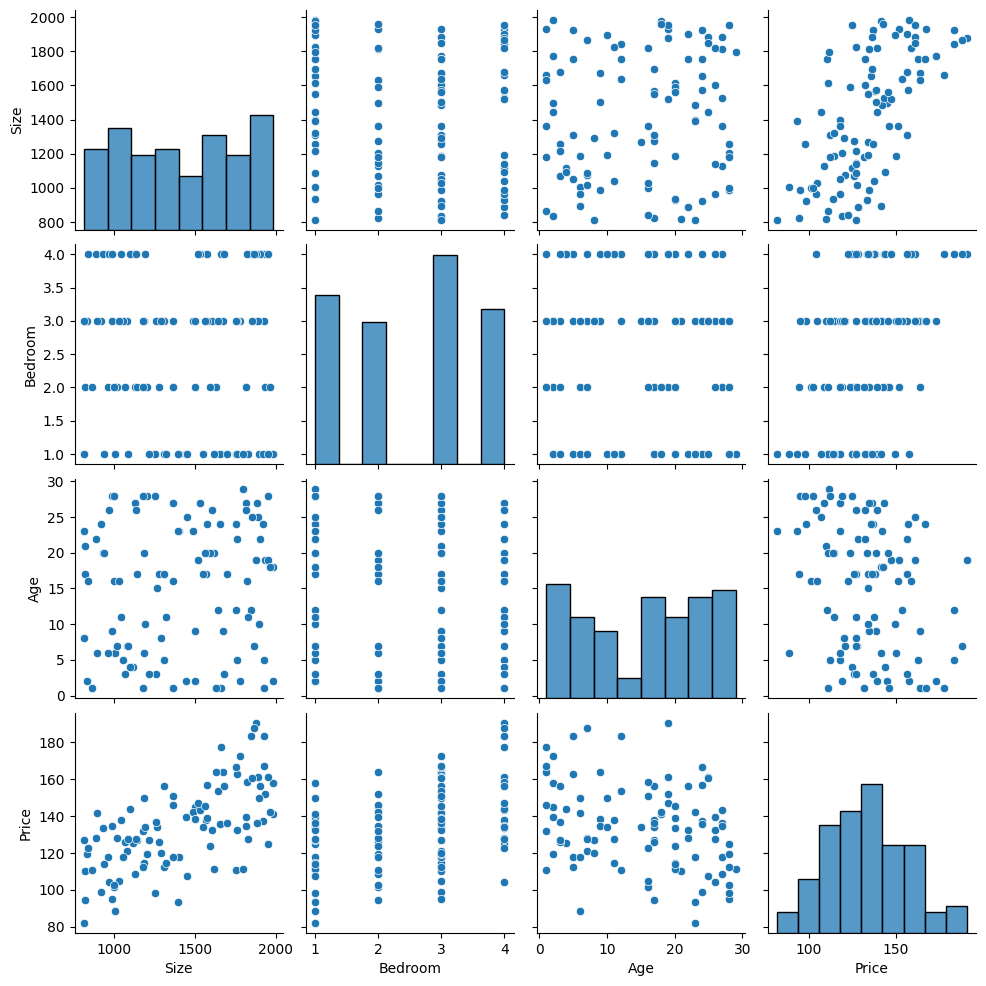

In [55]:
# visualize the data
sns.pairplot(df)

In [56]:
# dependent and independent variables
X = df[['Size', 'Bedroom', 'Age']]
y = df['Price'].values.reshape(-1, 1)

In [57]:
# normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [58]:
X = scaler.fit_transform(X)

In [59]:
X = np.hstack((np.ones((X.shape[0], 1)), X))  # add a bias term ??

In [60]:
print(X)

[[ 1.          1.42591267  1.34567699 -1.13624641]
 [ 1.          0.69237027  1.34567699 -1.58358751]
 [ 1.          1.43694339 -0.47280543  0.42944746]
 [ 1.          1.34042465 -1.38204664 -0.57707003]
 [ 1.          1.19978306  1.34567699 -0.35339947]
 [ 1.         -1.34555393  0.43643578  0.98862384]
 [ 1.         -0.39415495  0.43643578 -0.01789364]
 [ 1.         -0.76919918 -0.47280543  1.32412967]
 [ 1.         -1.43931499  1.34567699  0.76495329]
 [ 1.          1.41763964 -1.38204664  0.98862384]
 [ 1.          0.72270473  0.43643578 -0.6889053 ]
 [ 1.         -1.32073483  1.34567699  0.54128274]
 [ 1.          0.44142155  1.34567699  0.20577691]
 [ 1.         -0.73334937 -0.47280543  0.20577691]
 [ 1.          0.54069797  0.43643578  1.2122944 ]
 [ 1.         -0.61752688  0.43643578  0.54128274]
 [ 1.          0.9543497  -1.38204664 -0.35339947]
 [ 1.         -0.91811381  0.43643578 -0.91257586]
 [ 1.          1.58585801 -1.38204664 -1.47175224]
 [ 1.         -0.41345869  0.43

In [61]:
n_samples, n_features = X.shape

In [62]:
def compute_cost(X, y, theta):
    predictions = X.dot(theta)
    errors = predictions - y
    cost = (1 / (2 * len(y))) * np.sum(errors ** 2)
    return cost

In [63]:
def gradient_descent(X, y, theta, learning_rate, epochs):
    cost_history = []
    theta_history = [theta.copy()]

    for _ in range(epochs):
        gradients = (1 / n_samples) * X.T.dot(X.dot(theta) - y)
        theta -= learning_rate * gradients
        cost = compute_cost(X, y, theta)

        cost_history.append(cost)
        theta_history.append(theta.copy())
    return theta, cost_history, np.array(theta_history)

In [64]:
theta_init = np.zeros((n_features, 1))
theta_opt, cost_history, theta_path = gradient_descent(X, y, theta_init, learning_rate=0.1, epochs=100)


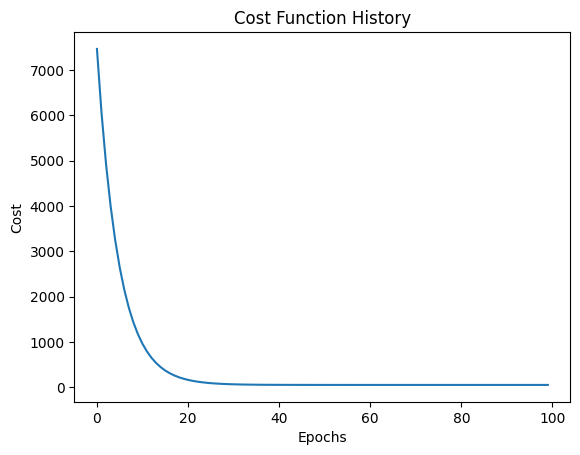

In [65]:
plt.plot(cost_history)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost Function History')
plt.show()

In [66]:
print(theta_opt[0, 0])  # Coefficient for Bias (intercept)
print(theta_opt[1, 0])  # Coefficient for Intercept (bias)
print(theta_opt[2, 0])  # Coefficient for Size
print(theta_opt[3, 0])  # Coefficient for Bedroom

133.7433707205777
16.51711473028152
11.046096660248754
-7.821361870213716


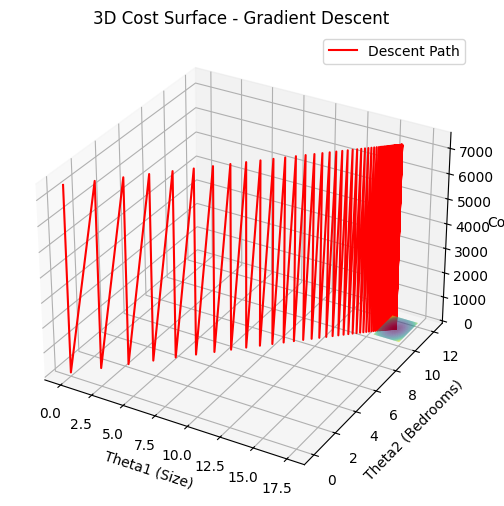

In [67]:
# Fix other weights (bias and age weight)
bias = theta_opt[0, 0]
theta_age = theta_opt[3, 0]

# Range for theta1 (Size weight) and theta2 (Bedrooms weight)
theta1_vals = np.linspace(theta_opt[1, 0] - 1, theta_opt[1, 0] + 1, 50)
theta2_vals = np.linspace(theta_opt[2, 0] - 1, theta_opt[2, 0] + 1, 50)

# Create a grid of theta1 and theta2 values
T1, T2 = np.meshgrid(theta1_vals, theta2_vals)
Z = np.zeros_like(T1)

# Compute cost at each grid point by changing only theta1 and theta2
for i in range(T1.shape[0]):
    for j in range(T1.shape[1]):
        theta_temp = np.array([
            [bias],
            [T1[i, j]],       # theta1 for Size
            [T2[i, j]],       # theta2 for Bedrooms
            [theta_age]       # fixed theta3 for Age
        ])
        Z[i, j] = compute_cost(X, y, theta_temp)

# Plotting the 3D surface
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(T1, T2, Z, cmap='viridis', alpha=0.8)

# Plot the path of gradient descent
ax.plot(theta_path[:, 1], theta_path[:, 2], cost_history, color='red', label='Descent Path')

ax.set_xlabel('Theta1 (Size)')
ax.set_ylabel('Theta2 (Bedrooms)')
ax.set_zlabel('Cost')
ax.set_title('3D Cost Surface - Gradient Descent')
plt.legend()
plt.show()


In [68]:
def predict_house_price(size, bedrooms, age):
    # Create 1 row of input data
    new_data = np.array([[size, bedrooms, age]])

    # Scale the new data using training mean and std
    mean = df[['Size', 'Bedroom', 'Age']].mean().values
    std = df[['Size', 'Bedroom', 'Age']].std().values
    scaled_data = (new_data - mean) / std

    # Add bias (intercept) column (value = 1)
    scaled_data = np.hstack((np.ones((1, 1)), scaled_data))

    # Make prediction
    predicted_price = scaled_data @ theta_opt
    return predicted_price[0, 0]

# Test it
predicted = predict_house_price(1500, 3, 10)
print(f"Predicted Price: ${predicted:.2f}k")


Predicted Price: $147.16k
